In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/movie_ratings.csv')
df.head(10)

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998
5,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994.0,1990.0,Children,1997
6,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994.0,1990.0,Comedy,1997
7,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,Drama,1997
8,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,Romance,1997
9,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,War,1997


In [4]:
genre_counts = df['genres'].value_counts()

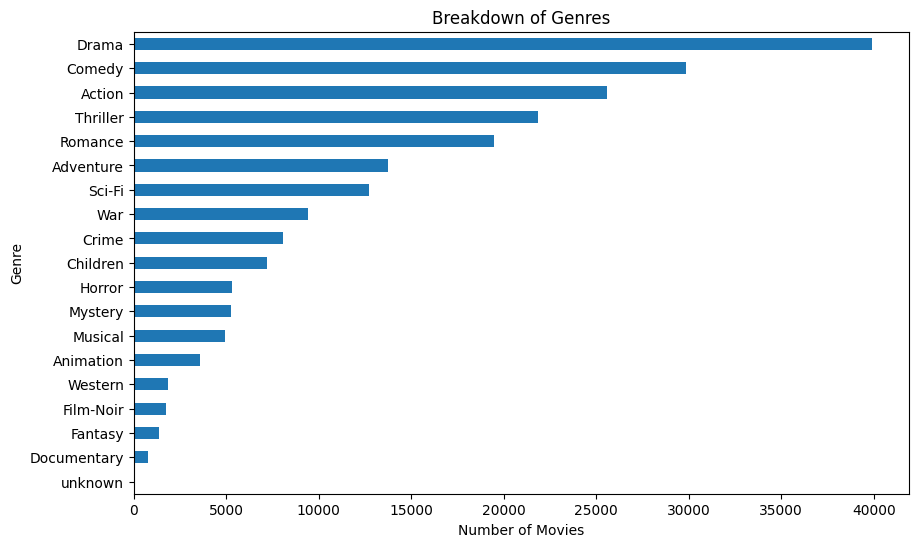

In [5]:
plt.figure(figsize=(10,6))
genre_counts.sort_values().plot(kind="barh")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Breakdown of Genres")
plt.show()

In [6]:
avg_rating_per_genre = df.groupby('genres')['rating'].mean().sort_values(ascending=False)

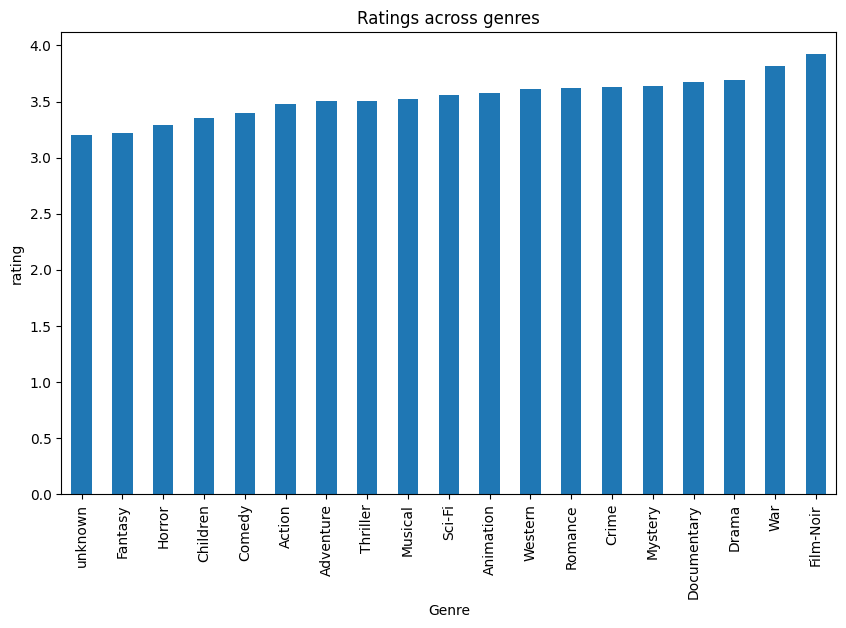

In [7]:
plt.figure(figsize=(10,6))
avg_rating_per_genre.sort_values().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("rating")
plt.title("Ratings across genres")
plt.show()

In [8]:
avg_rating_per_year = df.groupby('year')['rating'].mean().sort_values(ascending=False)

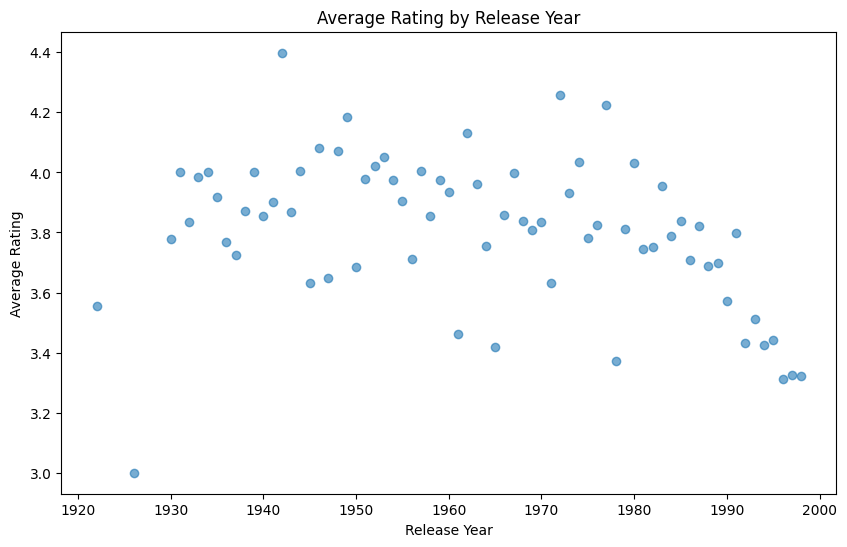

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(avg_rating_per_year.index, avg_rating_per_year.values,alpha =0.6)
plt.ylabel("Average Rating")
plt.xlabel("Release Year")
plt.title("Average Rating by Release Year")
plt.show()


In [10]:
#cant use og movie_rating df as it's exploded so we are artifically increasing count of movies with higher number of genres

df_unexploded = pd.read_csv('data/movie_ratings_EC.csv')
movie_stats = df_unexploded.groupby("title")["rating"].agg(["mean", "count"])

top50 = movie_stats[movie_stats["count"] >= 50].sort_values("mean", ascending=False).head(5)
top150 = movie_stats[movie_stats["count"] >= 150].sort_values("mean",ascending=False).head(5)

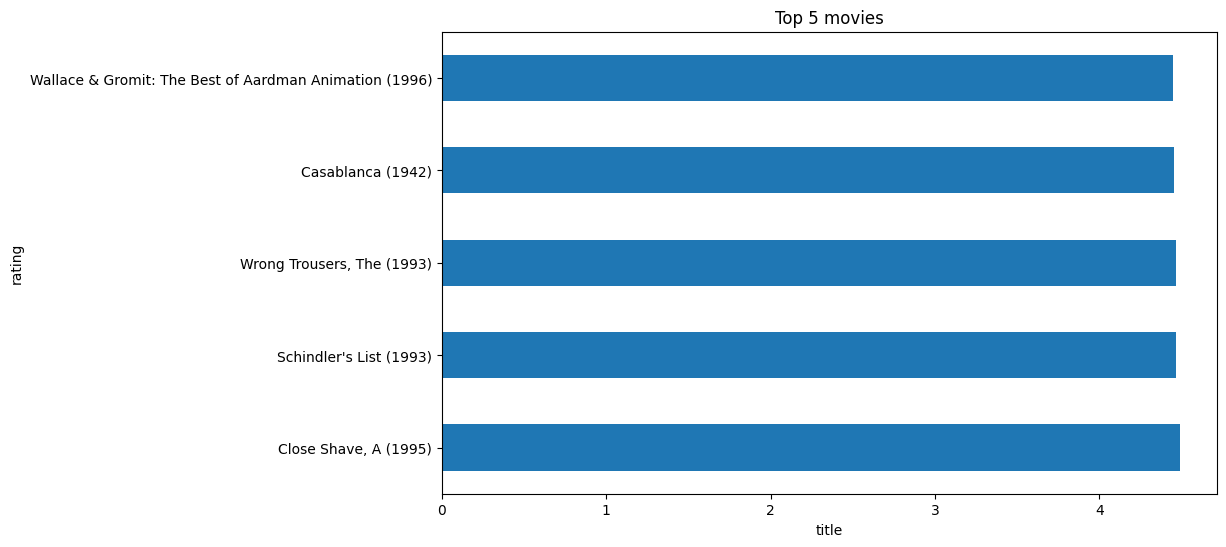

In [11]:
plt.figure(figsize=(10,6))
top50["mean"].plot(kind="barh")
plt.xlabel("title")
plt.ylabel("rating")
plt.title("Top 5 movies")
plt.show()

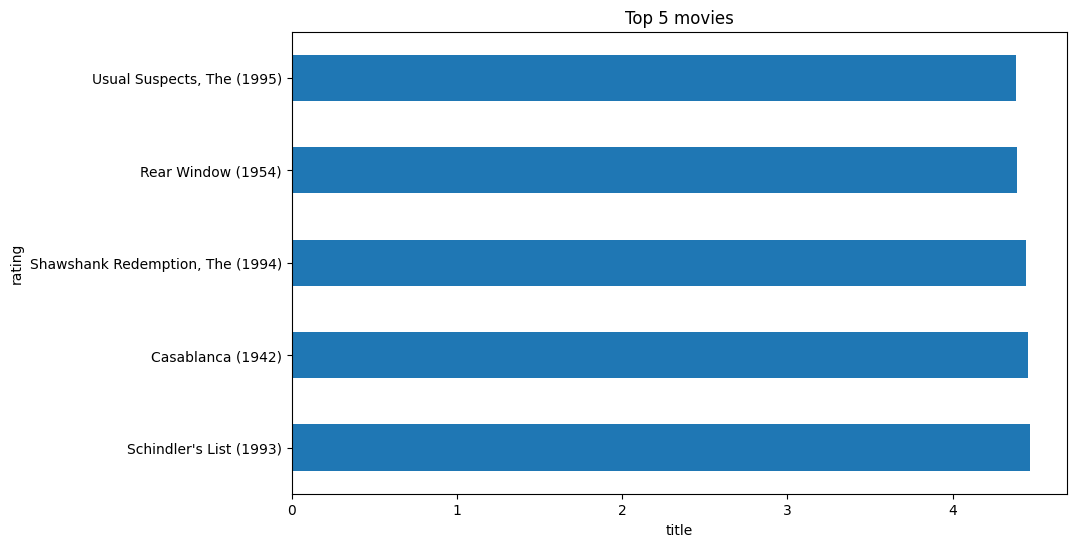

In [12]:
plt.figure(figsize=(10,6))
top150["mean"].plot(kind="barh")
plt.xlabel("title")
plt.ylabel("rating")
plt.title("Top 5 movies")
plt.show()

In [13]:
myGenres = ['Action','Drama','War','Film Noir','Sci-Fi']
df_genre = df[df['genres'].isin(myGenres)]
df_genre.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
7,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,Drama,1997
9,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,War,1997
12,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997.0,1990.0,Drama,1998
13,298,474,4,1998-01-07 14:20:06,44,M,executive,01581,Dr. Strangelove or: How I Learned to Stop Worr...,1963.0,1960.0,Sci-Fi,1998
14,298,474,4,1998-01-07 14:20:06,44,M,executive,01581,Dr. Strangelove or: How I Learned to Stop Worr...,1963.0,1960.0,War,1998


In [15]:
df_grouped = df_genre.groupby(['genres', 'age'])['rating'].mean().reset_index()
df_grouped.head()

,genres,age,rating
0,Action,7,3.611111
1,Action,10,4.000000
2,Action,11,3.076923
3,Action,13,3.493421
4,Action,14,3.593220
